In [1]:
from fastai.vision import *

In [2]:
base_path = Path.cwd()

In [3]:
path = base_path / 'img'

Верифицируем изображения

In [4]:
classes = ['leopard', 'snow leopard']

In [5]:
for c in classes:
    print(c)
    verify_images(path, delete=True, max_size=500)

leopard
snow leopard


Создаем датасет

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct=0.2, ds_tfms = get_transforms(),
                                  size = 224, num_workers = 0).normalize(imagenet_stats)

In [7]:
data.classes

['leopard', 'snow leopard']

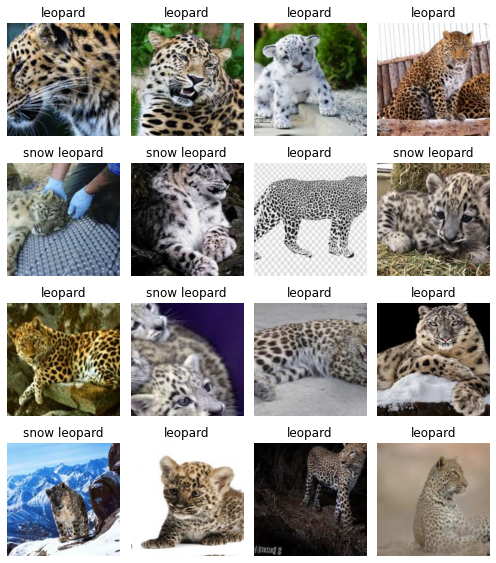

In [8]:
data.show_batch(rows = 4, figsize = (7, 8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['leopard', 'snow leopard'], 2, 626, 156)

Тренируем модель

In [10]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.900745,0.340146,0.057692,00:10
1,0.612151,0.468349,0.064103,00:07
2,0.489461,0.460787,0.076923,00:07
3,0.427120,0.430219,0.076923,00:07
4,0.372268,0.415191,0.076923,00:07


In [12]:
learn.save('stage-1')

In [13]:
learn.export()

Интерпретация

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

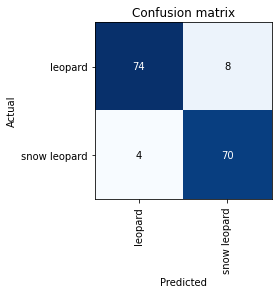

In [15]:
interp.plot_confusion_matrix()

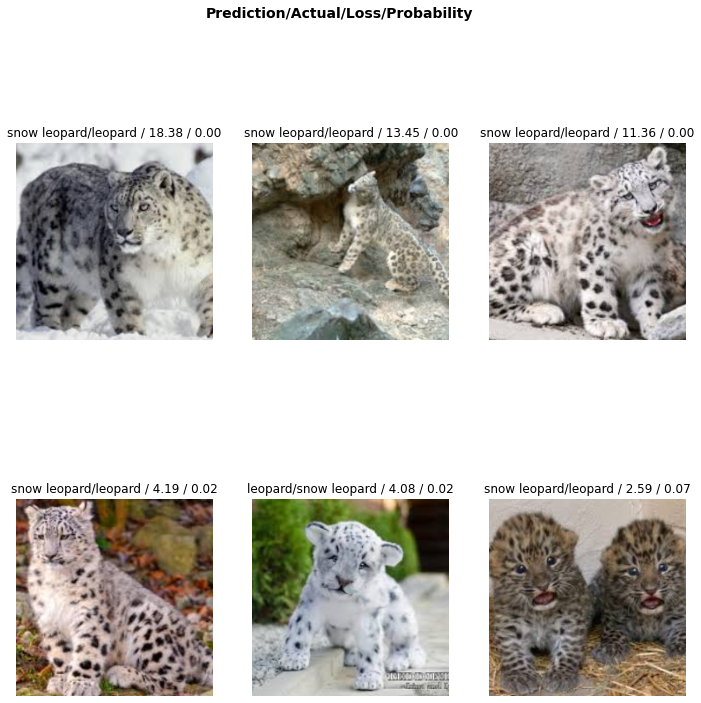

In [16]:
interp.plot_top_losses(6)

Тестирование

In [17]:
learn = load_learner(path)

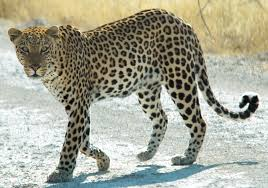

In [18]:
img = open_image(base_path/'test'/'test_image_1.jpeg')
img

In [19]:
pred_class, pred_idx, outputs = learn.predict(img)
print(str(pred_class))

leopard


In [20]:
outputs

tensor([9.9993e-01, 6.8780e-05])

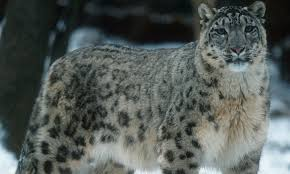

In [21]:
img = open_image(base_path/'test'/'test_image_2.jpeg')
img

In [22]:
pred_class, pred_idx, outputs = learn.predict(img)
print(str(pred_class))

snow leopard


In [23]:
outputs

tensor([4.4852e-04, 9.9955e-01])